In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#import dataset
data=pd.read_csv("weatherAUS.csv",sep=",")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
#check type and shape of data
print(data.shape)
data.info()

(142193, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 

In [4]:
#Change the type of "Date" variable
import datetime
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null datetime64[ns]
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-n

In [5]:
#Drop RISK_MM Variable
data.drop(['RISK_MM'], axis=1, inplace=True)

In [6]:
#Get Descriptive Statistics for numerical variables
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [7]:
#Get Descriptive Statistics for categorical variables
data.describe(include=['object'])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,132863,132180,138415,140787,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3418,9780,11393,10663,109332,110316


Text(0, 0.5, 'WindGustSpeed')

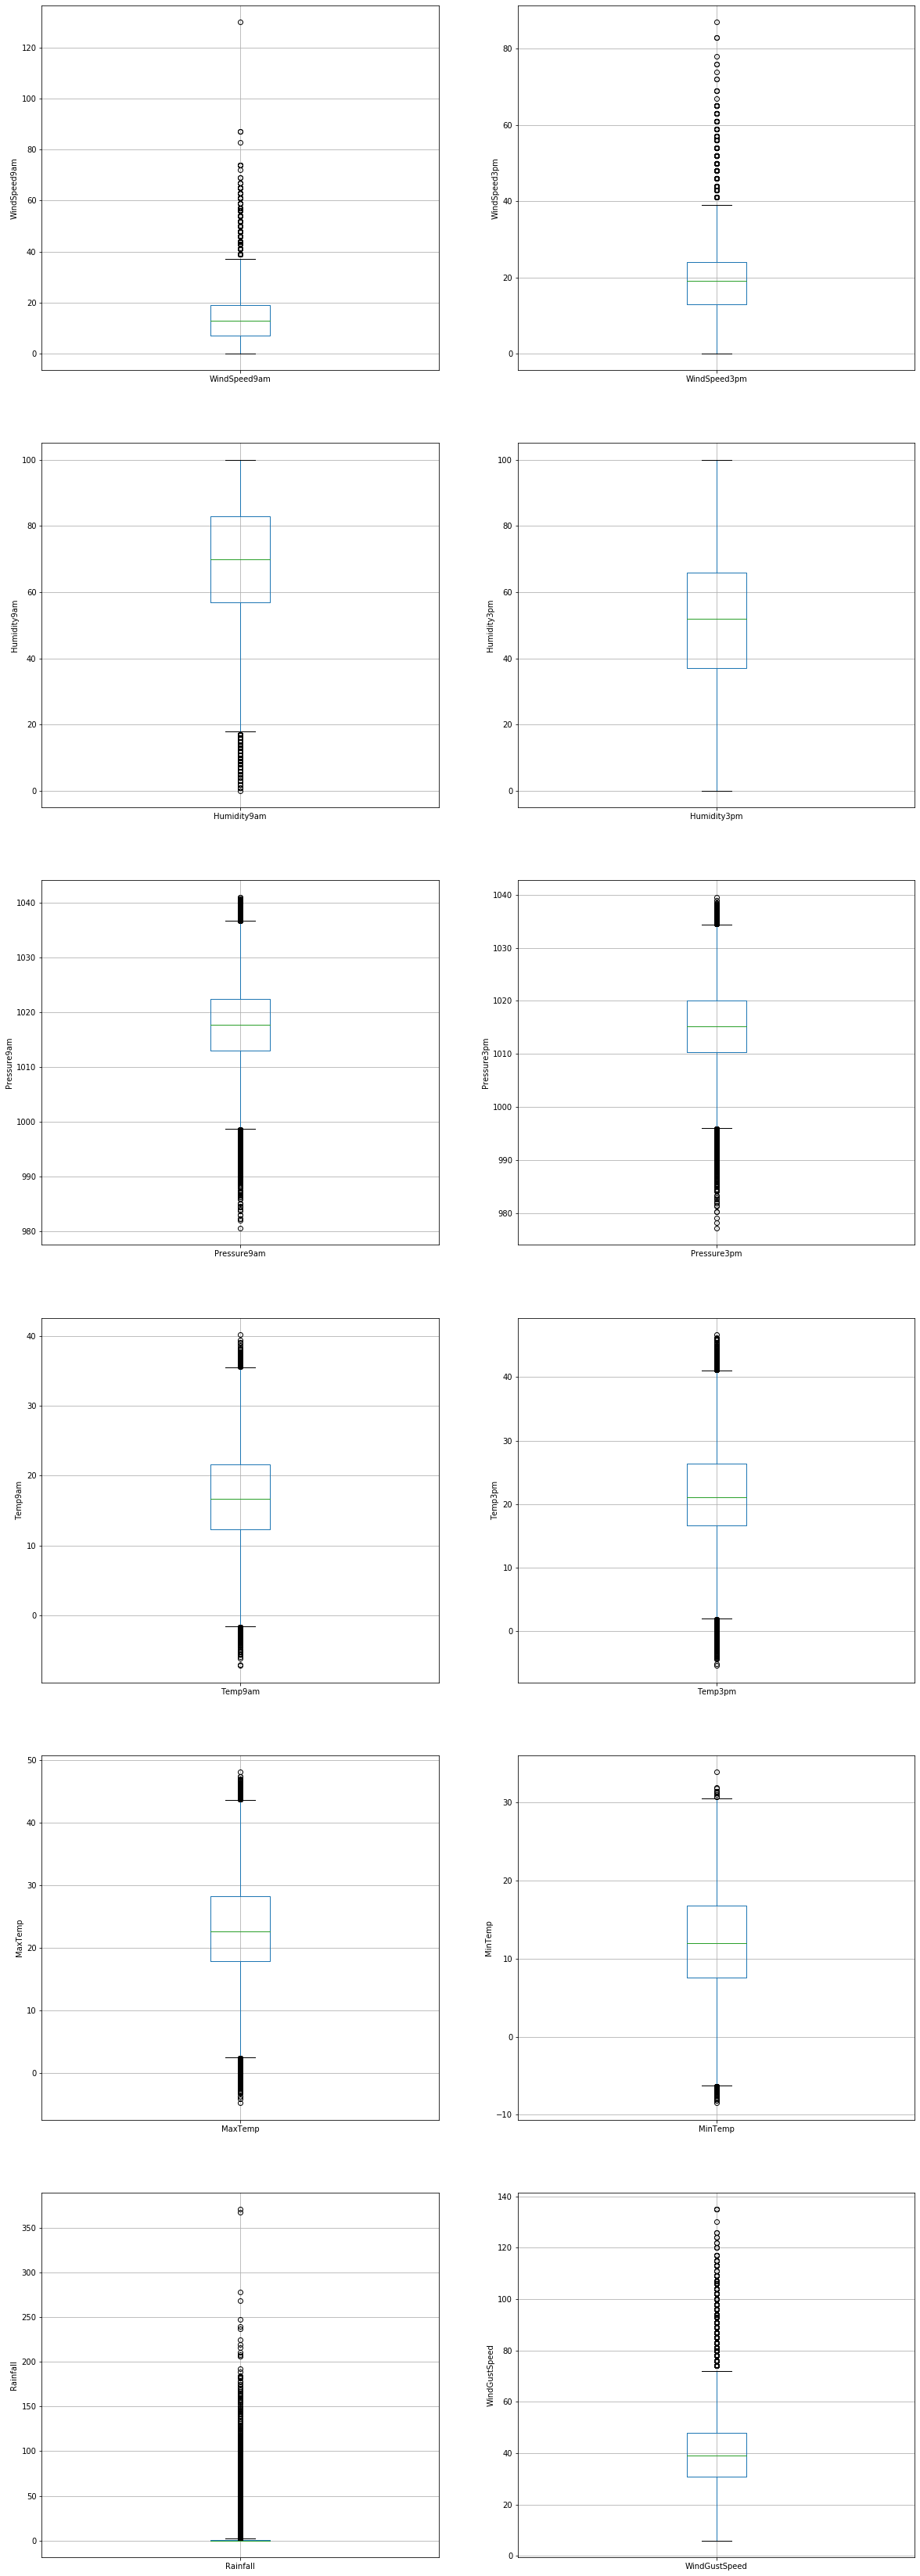

In [9]:
#Check Outliers using boxplot
plt.figure(figsize=(20,60))

plt.subplot(6,2,1)
fig=data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(6,2,2)
fig=data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(6,2,3)
fig=data.boxplot(column='Humidity9am')
fig.set_title('')
fig.set_ylabel('Humidity9am')

plt.subplot(6,2,4)
fig=data.boxplot(column='Humidity3pm')
fig.set_title('')
fig.set_ylabel('Humidity3pm')

plt.subplot(6,2,5)
fig=data.boxplot(column='Pressure9am')
fig.set_title('')
fig.set_ylabel('Pressure9am')

plt.subplot(6,2,6)
fig=data.boxplot(column='Pressure3pm')
fig.set_title('')
fig.set_ylabel('Pressure3pm')

plt.subplot(6,2,7)
fig=data.boxplot(column='Temp9am')
fig.set_title('')
fig.set_ylabel('Temp9am')

plt.subplot(6,2,8)
fig=data.boxplot(column='Temp3pm')
fig.set_title('')
fig.set_ylabel('Temp3pm')

plt.subplot(6,2,9)
fig=data.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')

plt.subplot(6,2,10)
fig=data.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')

plt.subplot(6,2,11)
fig=data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(6,2,12)
fig=data.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

Text(0, 0.5, 'Number of Counties')

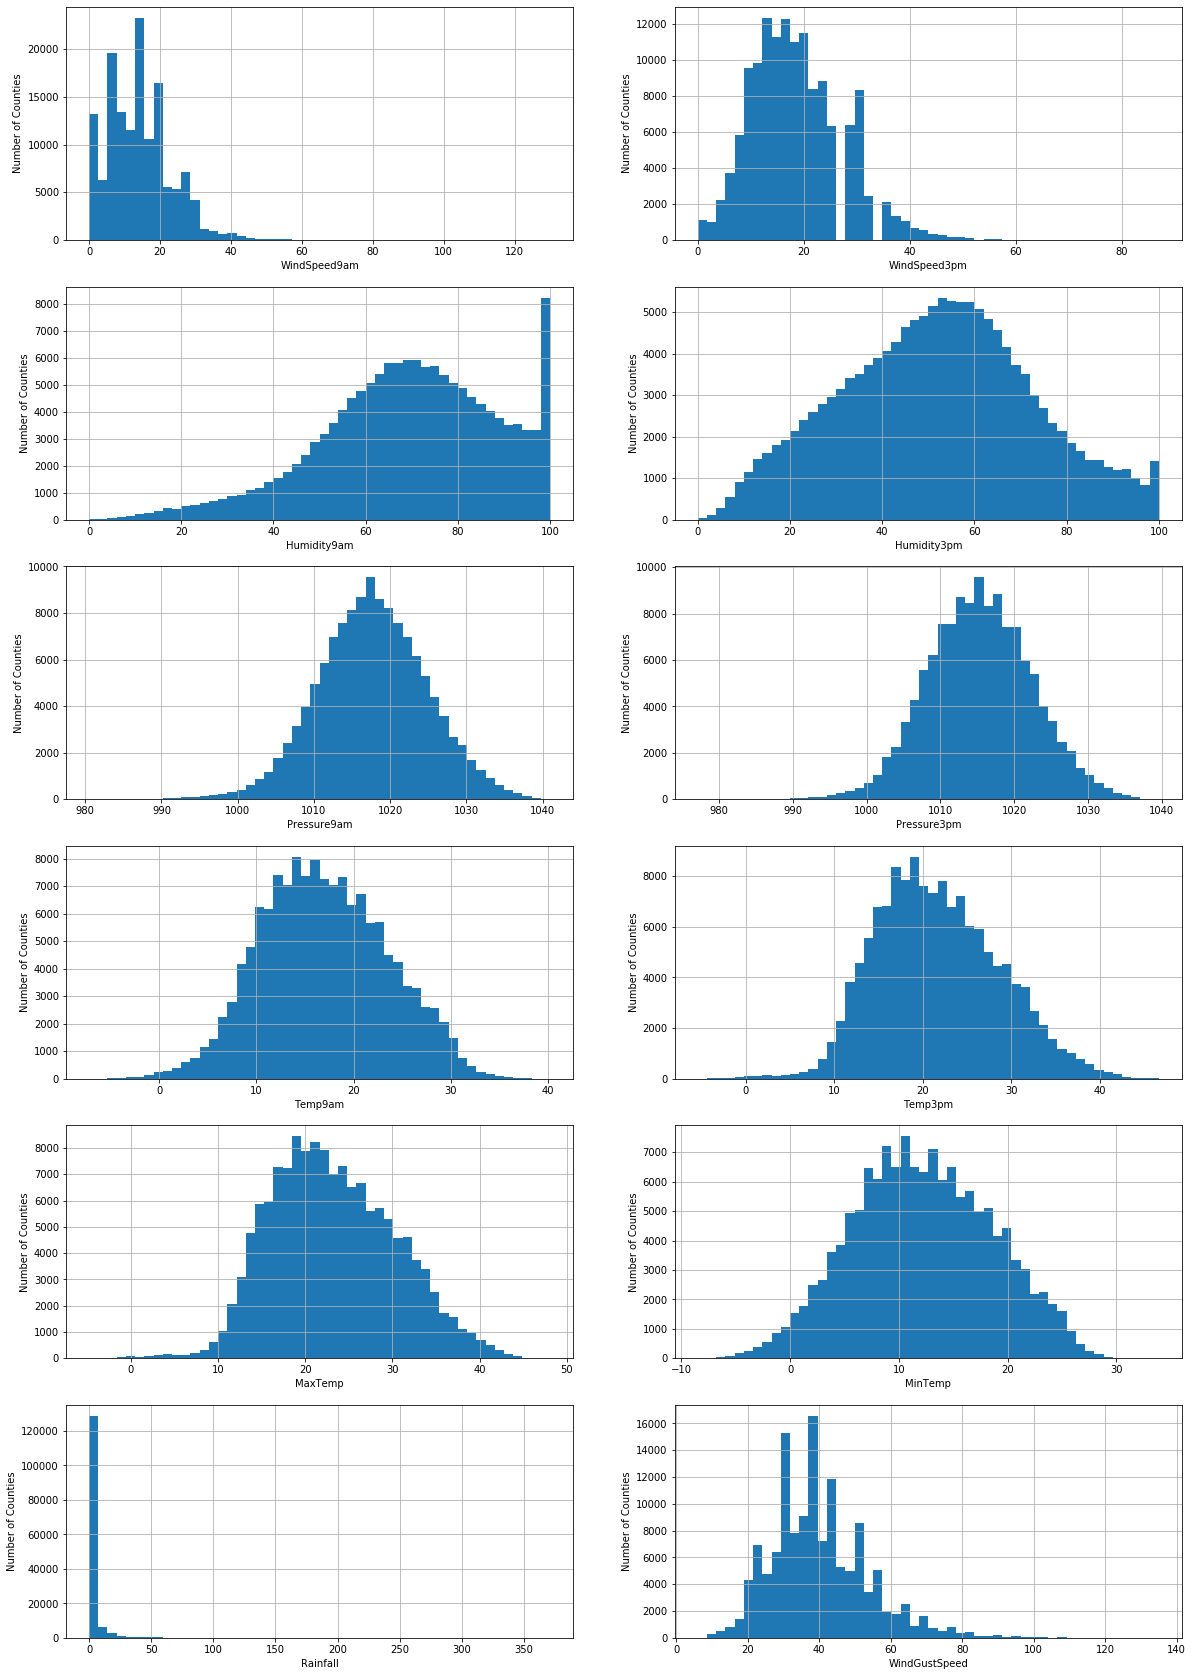

In [10]:
#Check data distribution using histogram
plt.figure(figsize=(20,30))

plt.subplot(6,2,1)
fig=data.WindSpeed9am.hist(bins=50)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('Number of Counties')

plt.subplot(6,2,2)
fig=data.WindSpeed3pm.hist(bins=50)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('Number of Counties')

plt.subplot(6,2,3)
fig=data.Humidity9am.hist(bins=50)
fig.set_xlabel('Humidity9am')
fig.set_ylabel('Number of Counties')

plt.subplot(6,2,4)
fig=data.Humidity3pm.hist(bins=50)
fig.set_xlabel('Humidity3pm')
fig.set_ylabel('Number of Counties')

plt.subplot(6,2,5)
fig=data.Pressure9am.hist(bins=50)
fig.set_xlabel('Pressure9am')
fig.set_ylabel('Number of Counties')

plt.subplot(6,2,6)
fig=data.Pressure3pm.hist(bins=50)
fig.set_xlabel('Pressure3pm')
fig.set_ylabel('Number of Counties')

plt.subplot(6,2,7)
fig=data.Temp9am.hist(bins=50)
fig.set_xlabel('Temp9am')
fig.set_ylabel('Number of Counties')

plt.subplot(6,2,8)
fig=data.Temp3pm.hist(bins=50)
fig.set_xlabel('Temp3pm')
fig.set_ylabel('Number of Counties')

plt.subplot(6,2,9)
fig=data.MaxTemp.hist(bins=50)
fig.set_xlabel('MaxTemp')
fig.set_ylabel('Number of Counties')

plt.subplot(6,2,10)
fig=data.MinTemp.hist(bins=50)
fig.set_xlabel('MinTemp')
fig.set_ylabel('Number of Counties')

plt.subplot(6,2,11)
fig=data.Rainfall.hist(bins=50)
fig.set_xlabel('Rainfall')
fig.set_ylabel('Number of Counties')

plt.subplot(6,2,12)
fig=data.WindGustSpeed.hist(bins=50)
fig.set_xlabel('WindGustSpeed')
fig.set_ylabel('Number of Counties')


In [11]:
#Check the missing value
print("The percentage of missing value:")
print(data.shape)
for col in data.columns:
    print(col+ " : "+ str(round(data[col].isnull().sum()/data.shape[0]*100,2))+"%")

The percentage of missing value:
(142193, 23)
Date : 0.0%
Location : 0.0%
MinTemp : 0.45%
MaxTemp : 0.23%
Rainfall : 0.99%
Evaporation : 42.79%
Sunshine : 47.69%
WindGustDir : 6.56%
WindGustSpeed : 6.52%
WindDir9am : 7.04%
WindDir3pm : 2.66%
WindSpeed9am : 0.95%
WindSpeed3pm : 1.85%
Humidity9am : 1.25%
Humidity3pm : 2.54%
Pressure9am : 9.86%
Pressure3pm : 9.83%
Cloud9am : 37.74%
Cloud3pm : 40.15%
Temp9am : 0.64%
Temp3pm : 1.92%
RainToday : 0.99%
RainTomorrow : 0.0%


In [12]:
#Drop 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm' variables
data.drop(['Evaporation','Sunshine', 'Cloud9am','Cloud3pm'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
Date             142193 non-null datetime64[ns]
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null object
dtypes: datetime64[ns](1), float64(12), object(6)
memory usage: 20.6+ MB


In [13]:
#Make a list for the names of numerical variables
num=[var for var in data.columns if data[var].dtype!='O']
num=num[1:] #without 'Date' variable
print(num)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [14]:
#Make a list for the names of categorical variables
cat = [col for col in data.columns if data[col].dtypes == 'O']
print(cat)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [15]:
#impute missing value in numerical variable by its median
for data1 in [data]:
    for col in num:
        col_median=data[col].median()
        data1[col].fillna(col_median, inplace=True)
data[num].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

In [16]:
#impute missing value in categorical variable by its mode
for data2 in [data]:
    for col in cat:
        col_mode=data[col].mode()[0]
        data2[col].fillna(col_mode, inplace=True)
data[cat].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [17]:
#Get the correlation among numerical variables
correlation=data[num].corr()
print(correlation)

                MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.733894  0.103205       0.172719      0.175126   
MaxTemp        0.733894  1.000000 -0.073862       0.066930      0.014805   
Rainfall       0.103205 -0.073862  1.000000       0.126684      0.085595   
WindGustSpeed  0.172719  0.066930  0.126684       1.000000      0.579196   
WindSpeed9am   0.175126  0.014805  0.085595       0.579196      1.000000   
WindSpeed3pm   0.174226  0.050309  0.056578       0.659084      0.512932   
Humidity9am   -0.232714 -0.500179  0.221110      -0.210104     -0.269041   
Humidity3pm    0.006051 -0.499633  0.249128      -0.027178     -0.031182   
Pressure9am   -0.424056 -0.308861 -0.159586      -0.426647     -0.214929   
Pressure3pm   -0.433704 -0.397168 -0.120331      -0.384828     -0.164775   
Temp9am        0.898129  0.880255  0.011333       0.146615      0.128765   
Temp3pm        0.699170  0.969297 -0.077464       0.032827      0.005479   

           

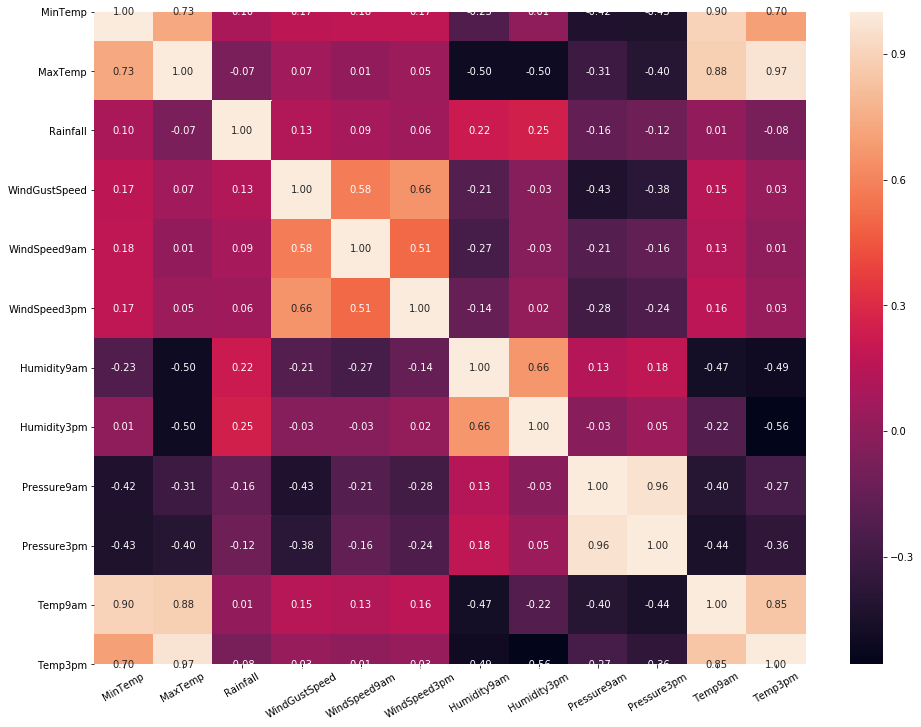

In [18]:
#Make Correlation Plot
plt.figure(figsize=(16,12))
corrplot=sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
corrplot.set_xticklabels(corrplot.get_xticklabels(),rotation=30)
corrplot.set_yticklabels(corrplot.get_yticklabels())
plt.show()

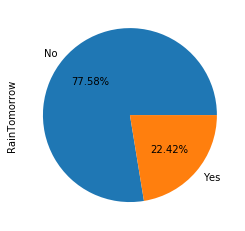

In [19]:
#Make Pie chart of "RainTomorrow" variable
data['RainTomorrow'].value_counts().plot.pie(autopct='%1.2f%%')

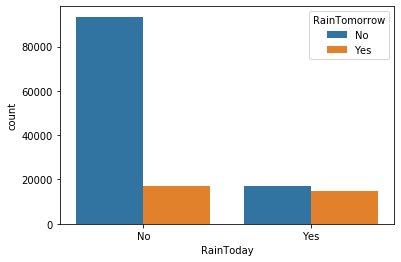

In [20]:
#Make Some Bar Charts
sns.countplot(x='RainToday',data=data,hue='RainTomorrow')

[Text(0, 0, 'Albury'),
 Text(0, 0, 'BadgerysCreek'),
 Text(0, 0, 'Cobar'),
 Text(0, 0, 'CoffsHarbour'),
 Text(0, 0, 'Moree'),
 Text(0, 0, 'Newcastle'),
 Text(0, 0, 'NorahHead'),
 Text(0, 0, 'NorfolkIsland'),
 Text(0, 0, 'Penrith'),
 Text(0, 0, 'Richmond'),
 Text(0, 0, 'Sydney'),
 Text(0, 0, 'SydneyAirport'),
 Text(0, 0, 'WaggaWagga'),
 Text(0, 0, 'Williamtown'),
 Text(0, 0, 'Wollongong'),
 Text(0, 0, 'Canberra'),
 Text(0, 0, 'Tuggeranong'),
 Text(0, 0, 'MountGinini'),
 Text(0, 0, 'Ballarat'),
 Text(0, 0, 'Bendigo'),
 Text(0, 0, 'Sale'),
 Text(0, 0, 'MelbourneAirport'),
 Text(0, 0, 'Melbourne'),
 Text(0, 0, 'Mildura'),
 Text(0, 0, 'Nhil'),
 Text(0, 0, 'Portland'),
 Text(0, 0, 'Watsonia'),
 Text(0, 0, 'Dartmoor'),
 Text(0, 0, 'Brisbane'),
 Text(0, 0, 'Cairns'),
 Text(0, 0, 'GoldCoast'),
 Text(0, 0, 'Townsville'),
 Text(0, 0, 'Adelaide'),
 Text(0, 0, 'MountGambier'),
 Text(0, 0, 'Nuriootpa'),
 Text(0, 0, 'Woomera'),
 Text(0, 0, 'Albany'),
 Text(0, 0, 'Witchcliffe'),
 Text(0, 0, 'PearceRAA

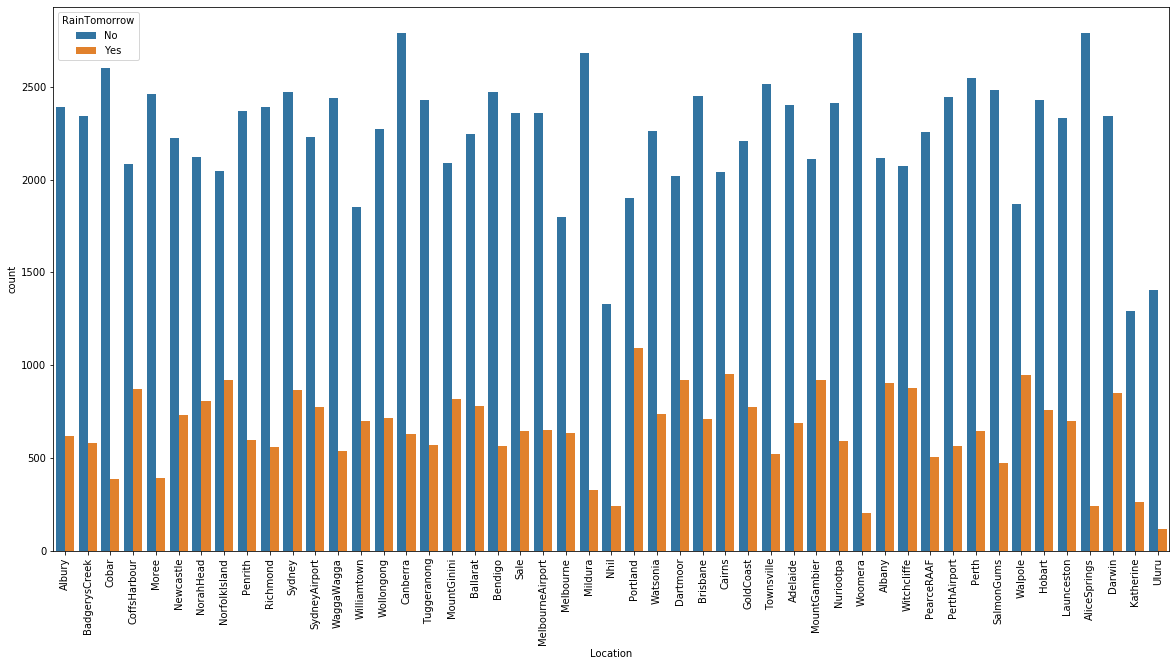

In [21]:
plt.figure(figsize=(20,10))
loc=sns.countplot(x='Location',data=data,hue='RainTomorrow')
loc.set_xticklabels(loc.get_xticklabels(),rotation=90)

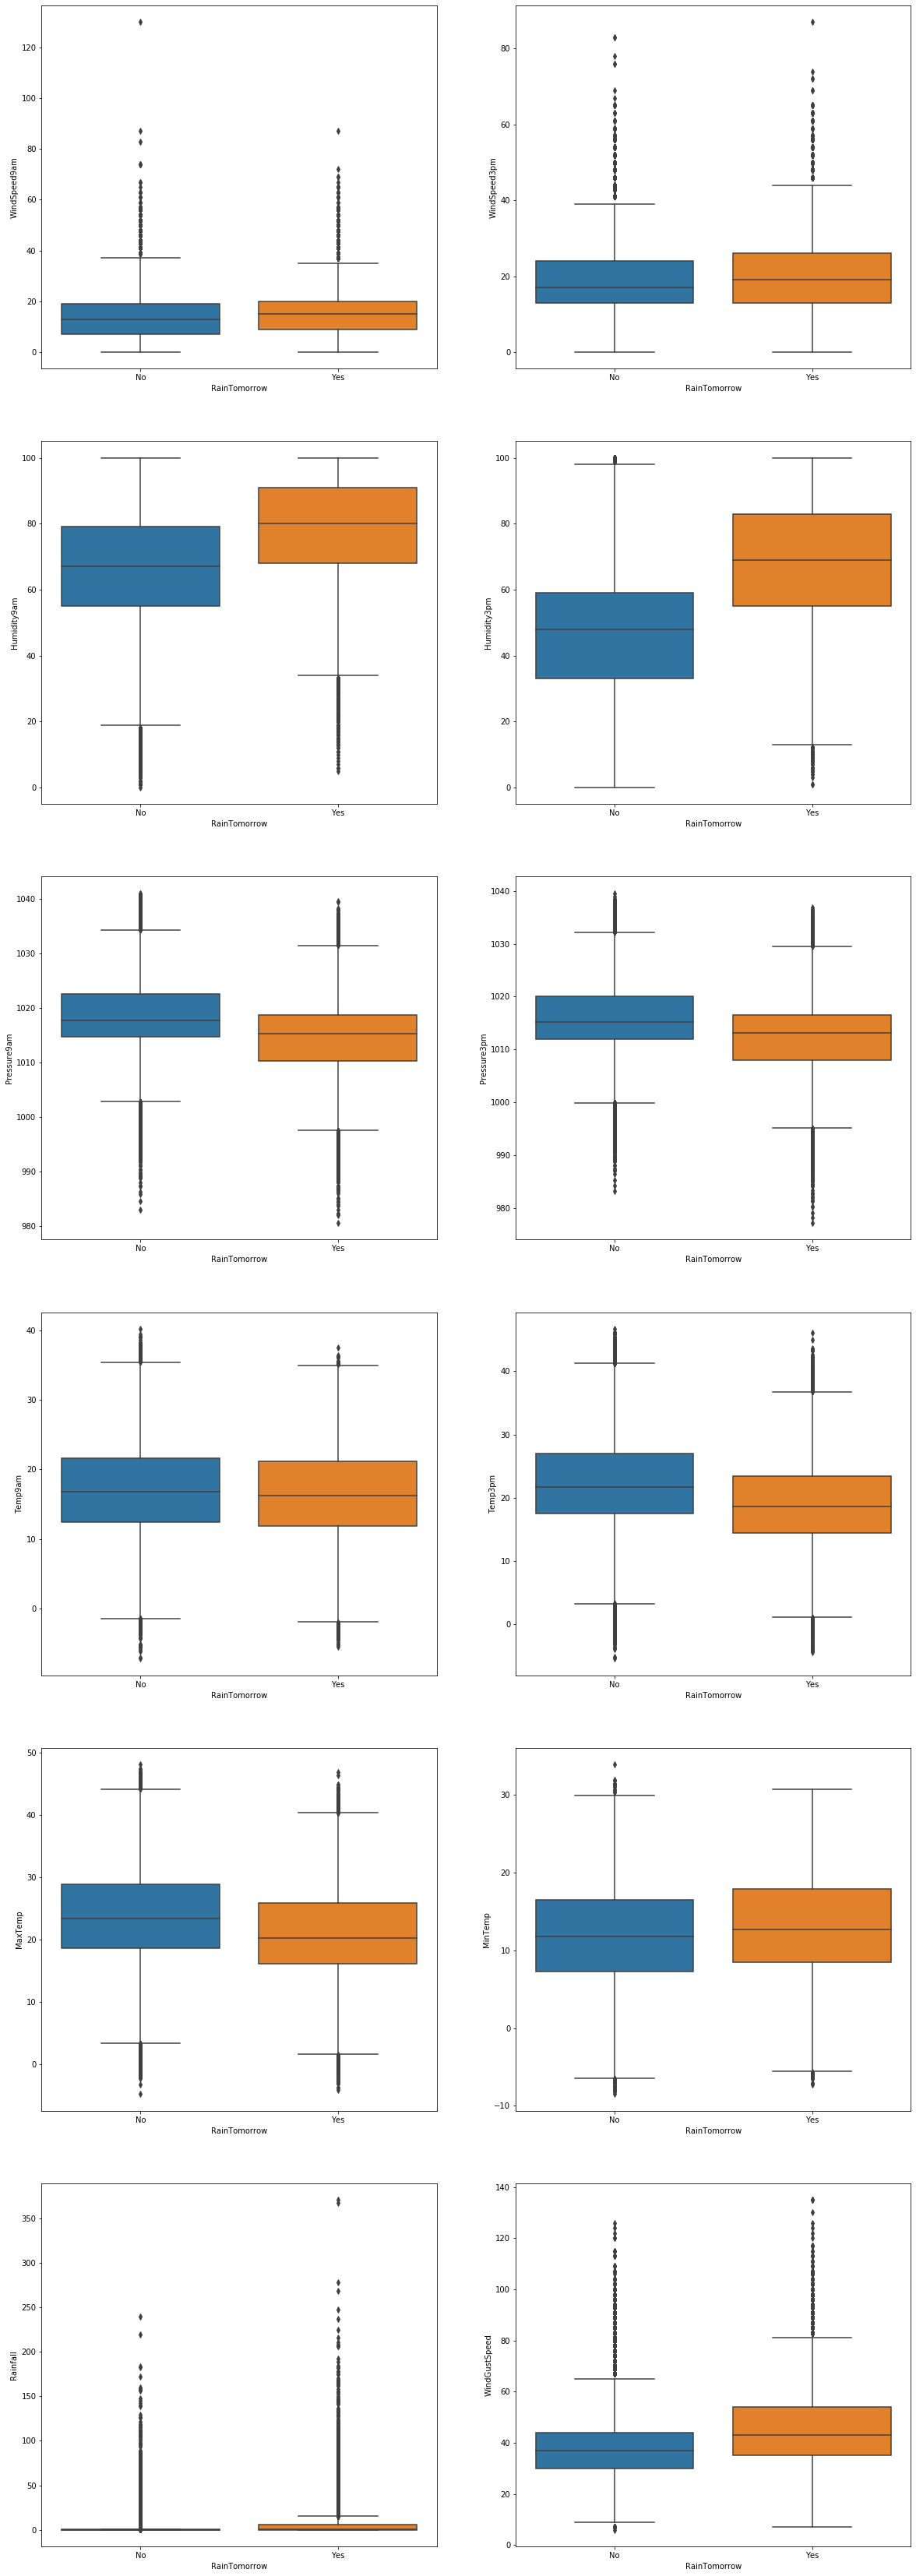

In [22]:
#Make boxplots grouped by 'RainTomorrow' variables
plt.figure(figsize=(20,60))

plt.subplot(6,2,1)
sns.boxplot(data=data,x="RainTomorrow",y="WindSpeed9am")

plt.subplot(6,2,2)
sns.boxplot(data=data,x="RainTomorrow",y="WindSpeed3pm")

plt.subplot(6,2,3)
sns.boxplot(data=data,x="RainTomorrow",y="Humidity9am")

plt.subplot(6,2,4)
sns.boxplot(data=data,x="RainTomorrow",y="Humidity3pm")

plt.subplot(6,2,5)
sns.boxplot(data=data,x="RainTomorrow",y="Pressure9am")

plt.subplot(6,2,6)
sns.boxplot(data=data,x="RainTomorrow",y="Pressure3pm")

plt.subplot(6,2,7)
sns.boxplot(data=data,x="RainTomorrow",y="Temp9am")

plt.subplot(6,2,8)
sns.boxplot(data=data,x="RainTomorrow",y="Temp3pm")

plt.subplot(6,2,9)
sns.boxplot(data=data,x="RainTomorrow",y="MaxTemp")

plt.subplot(6,2,10)
sns.boxplot(data=data,x="RainTomorrow",y="MinTemp")

plt.subplot(6,2,11)
sns.boxplot(data=data,x="RainTomorrow",y="Rainfall")

plt.subplot(6,2,12)
sns.boxplot(data=data,x="RainTomorrow",y="WindGustSpeed")

In [23]:
#Make a new data frame without "Date" variable
simpan=data.drop('Date',axis=1)
simpan.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [24]:
#Make a data frame grouped by "RainTomorrow" variable
yes=simpan[simpan['RainTomorrow']=='Yes']
no=simpan[simpan['RainTomorrow']=='No']
no.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


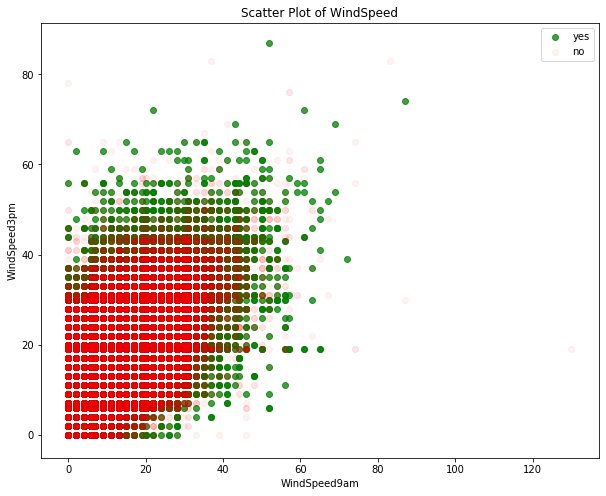

In [25]:
#Make some comparasions among some variables grouped by "RainTomorrow" variable
plt.figure(figsize=(10,8))
plt.scatter(yes["WindSpeed9am"],yes["WindSpeed3pm"], color="green",label="yes",alpha=0.75)
plt.scatter(no["WindSpeed9am"],no["WindSpeed3pm"], color="red",label="no",alpha=0.05)
plt.xlabel("WindSpeed9am")
plt.ylabel("WindSpeed3pm")
plt.title("Scatter Plot of WindSpeed")
plt.legend()
plt.show()

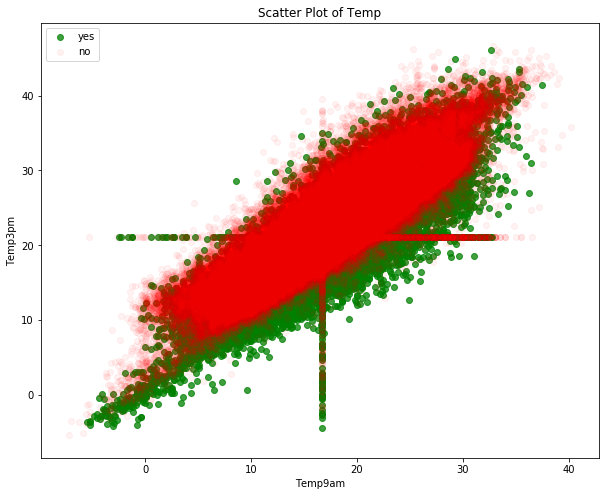

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(yes["Temp9am"],yes["Temp3pm"], color="green",label="yes",alpha=0.75)
plt.scatter(no["Temp9am"],no["Temp3pm"], color="red",label="no",alpha=0.05)
plt.xlabel("Temp9am")
plt.ylabel("Temp3pm")
plt.title("Scatter Plot of Temp")
plt.legend()
plt.show()

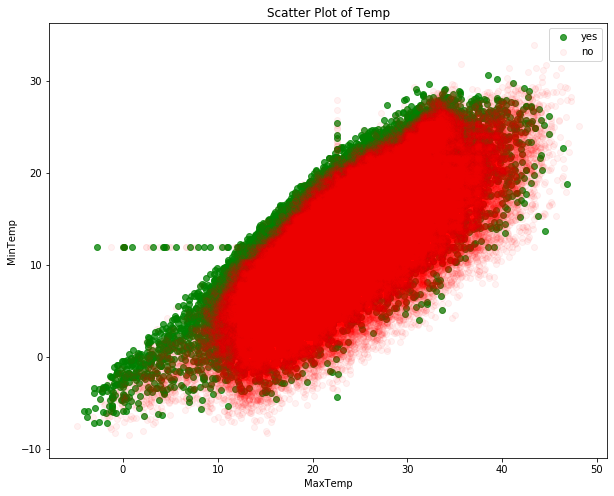

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(yes["MaxTemp"],yes["MinTemp"], color="green",label="yes",alpha=0.75)
plt.scatter(no["MaxTemp"],no["MinTemp"], color="red",label="no",alpha=0.05)
plt.xlabel("MaxTemp")
plt.ylabel("MinTemp")
plt.title("Scatter Plot of Temp")
plt.legend()
plt.show()

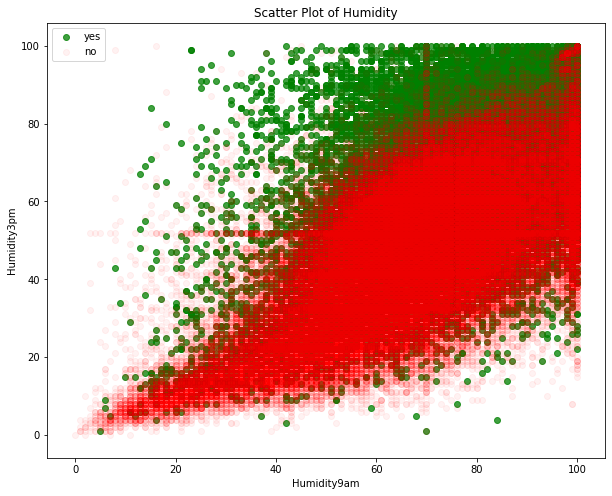

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(yes["Humidity9am"],yes["Humidity3pm"], color="green",label="yes",alpha=0.75)
plt.scatter(no["Humidity9am"],no["Humidity3pm"], color="red",label="no",alpha=0.05)
plt.xlabel("Humidity9am")
plt.ylabel("Humidity3pm")
plt.title("Scatter Plot of Humidity")
plt.legend()
plt.show()

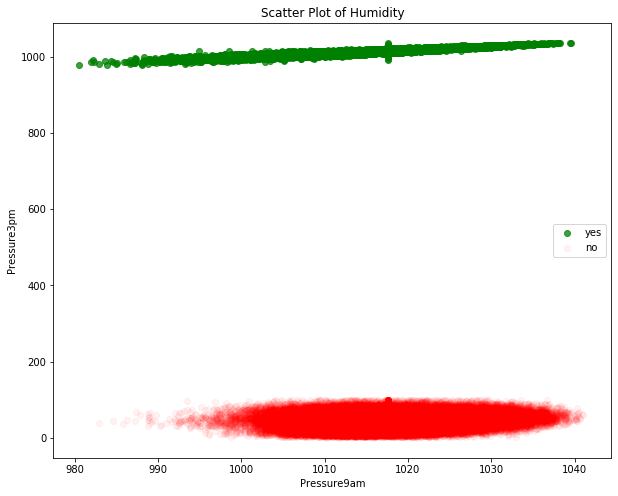

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(yes["Pressure9am"],yes["Pressure3pm"], color="green",label="yes",alpha=0.75)
plt.scatter(no["Pressure9am"],no["Humidity3pm"], color="red",label="no",alpha=0.05)
plt.xlabel("Pressure9am")
plt.ylabel("Pressure3pm")
plt.title("Scatter Plot of Humidity")
plt.legend()
plt.show()